# Ensemble Bagging

---

A Bagging model is a type of Ensemble method used for classification or regression. It uses the same training algorithm for every predictor and trains them on different random subsets of the training set. When sampling is performed *with* replacement, it is called **Bagging**.

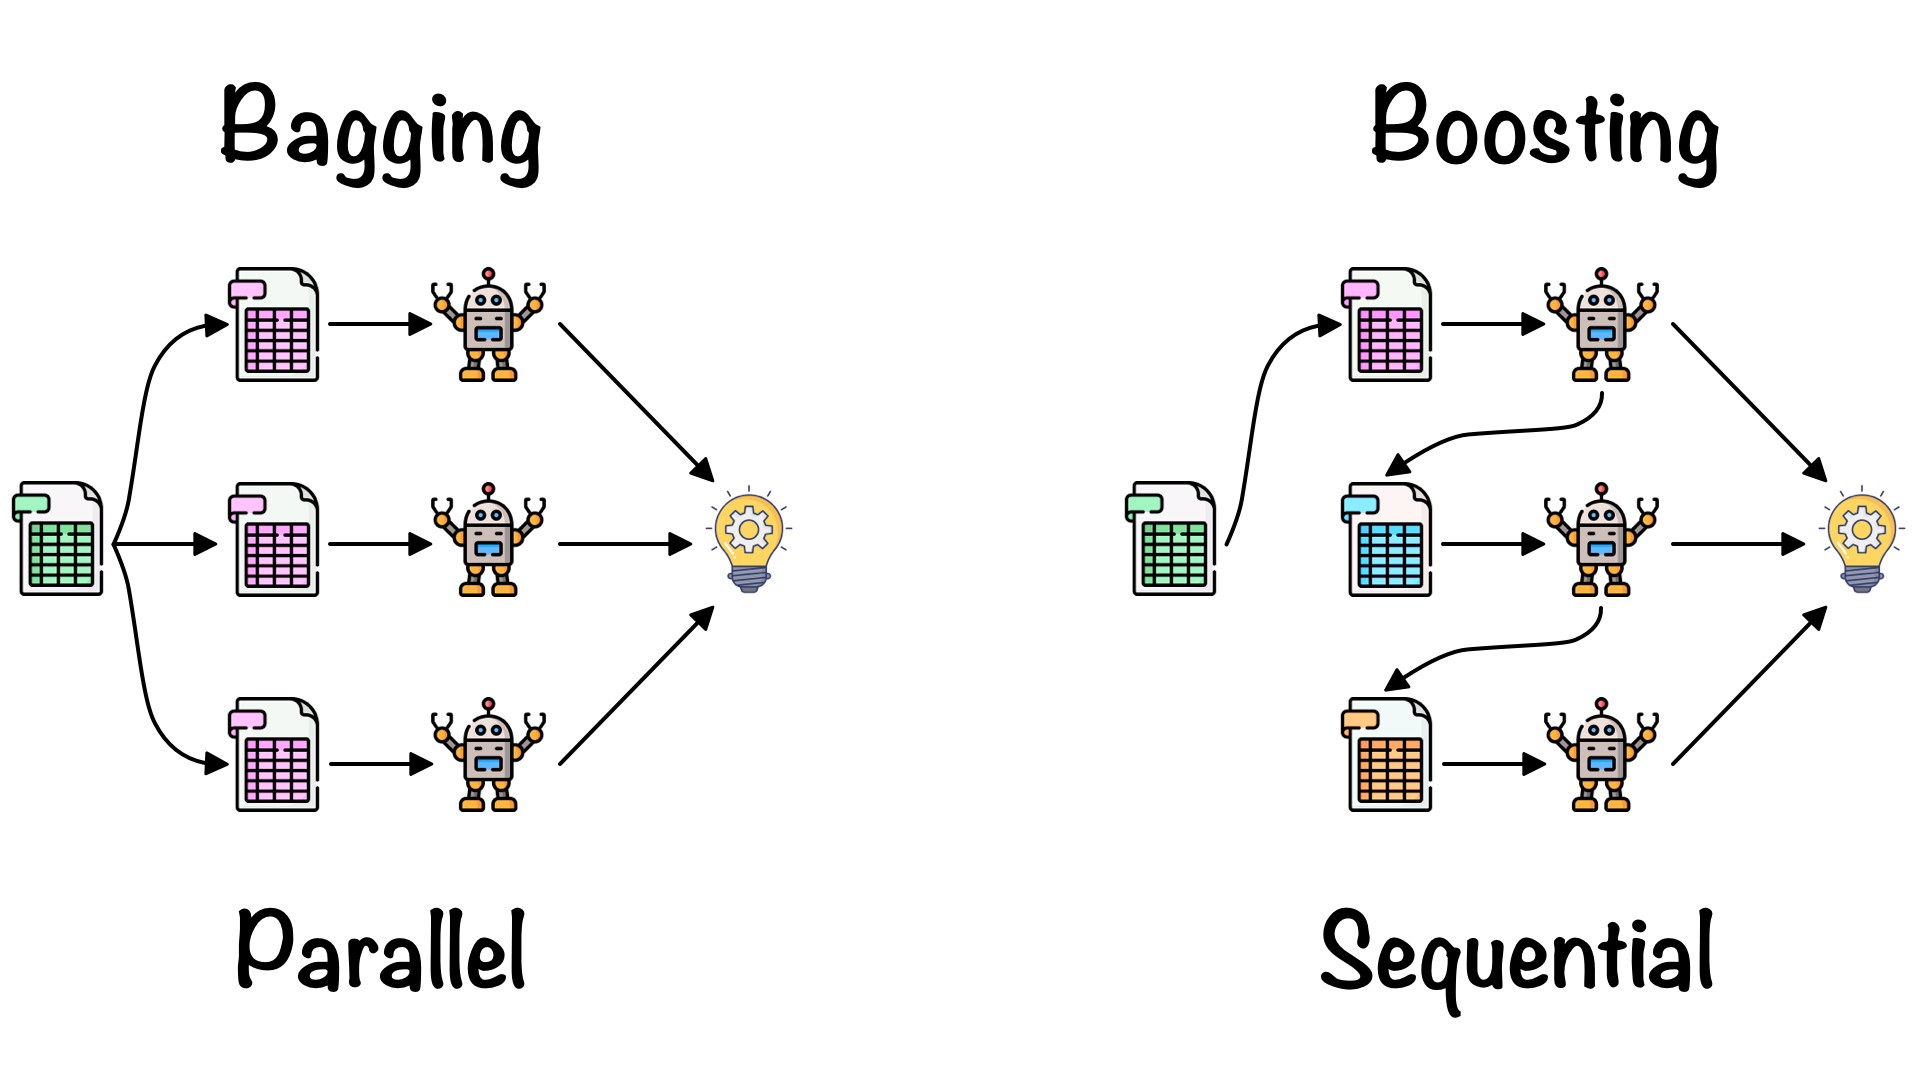

---

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
cars = pd.read_csv('cars.csv')

## Exploratory Data Analysis

In [3]:
cars.shape

(1728, 7)

---

We can see that there are 1728 instances and 7 variables in the dataset. Let's view the top 5 instances and a summary of the data.

---

In [4]:
cars.head()

,price,maintenance,doors,passengers,trunk_space,safety,state
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [5]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
price          1728 non-null object
maintenance    1728 non-null object
doors          1728 non-null object
passengers     1728 non-null object
trunk_space    1728 non-null object
safety         1728 non-null object
state          1728 non-null object
dtypes: object(7)
memory usage: 94.6+ KB


---

This dataset is about evaluating the state of a list of vehicles. Our goal is to predict the ```state``` variable (or desirability) of a car using the other variables. Let's next split our dataset into our instances, X, and label, y.

---

In [6]:
col_names = ['price', 'maintenance', 'doors', 'passengers', 'trunk_space', 'safety']

X = cars[col_names]
y = cars['state']

---
## Building Our Bagging Model

We are concerned with how our ML models perform on out of sample data, so we'll next use ```sklearn.model_selection.train_test_split``` to partition our data into training and testing subsets. Documentation of this function can be found at [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html?highlight=train_test_split#sklearn.model_selection.train_test_split)


---

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 40)

---

We next need to encode the categorical data in our ```X_train``` and ```X_test``` datasets into binary values. We'll need to import the ```category_encoders``` module, documentation for which can be found at [category_encoders](https://contrib.scikit-learn.org/category_encoders/).

We'll then change the ```X_train``` and ```X_test``` datasets into binary values.

---

In [9]:
import category_encoders as ce

encoder = ce.OrdinalEncoder(cols=col_names)

X_train = encoder.fit_transform(X_train)
X_test = encoder.fit_transform(X_test)

---

Preview datasets to confirm the encoder worked.

---

In [10]:
print(X_train.head())
print(X_test.head())

      price  maintenance  doors  passengers  trunk_space  safety
1417      1            1      1           1            1       1
404       2            2      2           2            2       2
1273      3            2      3           3            1       1
1423      1            1      1           2            3       1
192       2            1      3           3            1       3
      price  maintenance  doors  passengers  trunk_space  safety
237       2            4      1           2            1       3
854       4            2      3           1            2       2
752       4            4      3           2            1       2
1674      1            2      2           3            3       3
189       2            1      3           3            3       3


---

Our target variable is a categorical data type, so to build our model we'll need to import ```sklearn.ensemble.BaggingClassifier```, documentation for which can be found at [BaggingClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html#sklearn.ensemble.BaggingClassifier). 

We want to see what ML models work best with the ```BaggingClassifier``` module, so we'll generate models using the Decision Tree Classifier (which is set by default), KNeighbors Classifier, LogisticRegression, and the Perceptron model.

Let's begin by importing ```sklearn.neighbors.KNeighborsClassifier```, documentation for which can be found at [KNeighborsClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)

Then we'll import ```sklearn.linear_model.LogisticRegression```, documentation for which can be found at [LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html).

Finally, we'll import ```sklearn.linear_model.Perceptron```, documentation for which can be found at [Perceptron](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html).


---

In [18]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron

---
### Bagging: DecisionTree

We will now instantiate the ```BaggingClassifier``` module using the default estimator (```DecisionTreeClassifier``` by default) with 750 estimators and bootstrapping set to True. 

Next, we'll fit our model to our training datasets and then we'll predict on unseen data from our test datasets.

---

In [24]:
bag_clf = BaggingClassifier(n_estimators = 750,
                            bootstrap=True, 
                            n_jobs = -1,
                            random_state = 40)

bag_clf.fit(X_train, y_train)

pred_dt = bag_clf.predict(X_test)

---

Let's check the accuracy of our model. To do so we'll need to import ```sklearn.metrics.accuracy_score```, documentation for which can be found at [accuracy_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html).

---

In [25]:
from sklearn.metrics import accuracy_score

print(f"Bagging Classifier model with 100 estimators yields an accuracy score of {np.round(100*accuracy_score(y_test, pred_dt), 2)}%")

Bagging Classifier model with 100 estimators yields an accuracy score of 94.68%


---

Our Bagging Classifier model, instantiated with the DecisionTreeClassifier by default, yielded high accuracy score of almost 95%. This is a very high score, however; let's see how our Bagging model performs when instantiated with the other Classifiers.

---

---
### Bagging: KNeighborsClassifier

We will now instantiate the ```BaggingClassifier``` module using the ```KneighborsClassifier``` estimator, 750 estimators, and bootstrapping set to True. 

Next, we'll fit our model to our training datasets and then we'll predict on unseen data from our test datasets.

Then, we'll check the accuracy of our model.

---

In [39]:
bag_clf = BaggingClassifier(KNeighborsClassifier(),
                            n_estimators = 750,
                            bootstrap=True, 
                            n_jobs = -1,
                            random_state = 40)

bag_clf.fit(X_train, y_train)

pred_knn = bag_clf.predict(X_test)

print(f"Bagging Classifier model with 100 estimators yields an accuracy score of {np.round(100*accuracy_score(y_test, pred_knn), 2)}%")

Bagging Classifier model with 100 estimators yields an accuracy score of 88.43%


---
### Bagging: LogisticRegression

We will now instantiate the ```BaggingClassifier``` module using the ```LogisticRegression``` estimator, 750 estimators, and bootstrapping set to True. 

Next, we'll fit our model to our training datasets and then we'll predict on unseen data from our test datasets.

Then, we'll check the accuracy of our model.

---

In [41]:
bag_clf = BaggingClassifier(LogisticRegression(),
                            n_estimators = 750, 
                            n_jobs = -1,
                            random_state = 40,
                            bootstrap=True)

bag_clf.fit(X_train, y_train)

pred_lr = bag_clf.predict(X_test)

print(f"Bagging Classifier model with 100 estimators yields an accuracy score of {np.round(100*accuracy_score(y_test, pred_lr), 2)}%")

Bagging Classifier model with 100 estimators yields an accuracy score of 75.46%


---
### Bagging: Perceptron

We will now instantiate the ```BaggingClassifier``` module using the ```Perceptron``` estimator, 750 estimators, and bootstrapping set to True. 

Next, we'll fit our model to our training datasets and then we'll predict on unseen data from our test datasets.

Then, we'll check the accuracy of our model.

---

In [28]:
bag_clf = BaggingClassifier(Perceptron(),
                            n_estimators = 750,
                            bootstrap=True, 
                            n_jobs = -1,
                            random_state = 40)

bag_clf.fit(X_train, y_train)

pred_per = bag_clf.predict(X_test)

print(f"Bagging Classifier model with 100 estimators yields an accuracy score of {np.round(100*accuracy_score(y_test, pred_per), 2)}%")

Bagging Classifier model with 100 estimators yields an accuracy score of 73.84%


## Conclusion

---

Of the 4 classifers used, Decision Tree, KNeighbors, Logistic Regression, and Perceptron, which performed the best?

---

In [31]:
print('Accuracy Score of Bagging Classifer using:')
print(f"Decision Tree: {np.round(100*accuracy_score(y_test, pred_dt), 2)}%")
print(f"KNeighbors: {np.round(100*accuracy_score(y_test, pred_knn), 2)}%")
print(f"Logistic Regression: {np.round(100*accuracy_score(y_test, pred_lr), 2)}%")
print(f"Perceptron: {np.round(100*accuracy_score(y_test, pred_per), 2)}%")

Accuracy Score of Bagging Classifer using:
Decision Tree: 94.68%
KNeighbors: 88.43%
Logistic Regression: 75.46%
Perceptron: 73.84%


---

From the ensemble of methods above we can see that the Decision Tree Classifier outperformed all other classifiers on this dataset. Like the Ensemble Random Forest Classifier, it has a very high accuracy score.

---